### **Problem Statement**:  

Wikipedia is the world’s largest and most popular reference work on the internet with about 500 million unique visitors per month. It also has millions of contributors who can make edits to pages. The Talk edit pages, the key community interaction forum where the contributing community interacts or discusses or debates about the changes pertaining to a particular topic. 

Wikipedia continuously strives to help online discussion become more productive and respectful. You are a data scientist at Wikipedia who will help Wikipedia to build a predictive model that identifies toxic comments in the discussion and marks them for cleanup by using NLP and machine learning. Post that, help identify the top terms from the toxic comments. 

**Domain**: Internet

**Analysis to be done**: Build a text classification model using NLP and machine learning that detects toxic comments.

### **Steps to perform**:

Cleanup the text data, using TF-IDF convert to vector space representation, use Support Vector Machines to detect toxic comments. Finally, get the list of top 15 toxic terms from the comments identified by the model.

**Tasks**: 

1. Load the data using read_csv function from pandas package

In [1]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


# Importing required module

In [2]:
import pandas as pd
import nltk
nltk.download('punkt')
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import string
import re
import nltk
nltk.download('stopwords')
import numpy as np

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
wiki = pd.read_csv('train.csv')

In [4]:
wiki.head()

,id,comment_text,toxic
0,e617e2489abe9bca,"""\r\n\r\n A barnstar for you! \r\n\r\n The De...",0
1,9250cf637294e09d,"""\r\n\r\nThis seems unbalanced. whatever I ha...",0
2,ce1aa4592d5240ca,"Marya Dzmitruk was born in Minsk, Belarus in M...",0
3,48105766ff7f075b,"""\r\n\r\nTalkback\r\n\r\n Dear Celestia... """,0
4,0543d4f82e5470b6,New Categories \r\n\r\nI honestly think that w...,0


# Data Exploration

In [5]:
wiki.shape

(5000, 3)

In [6]:
wiki['toxic'].value_counts()

0    4563
1     437
Name: toxic, dtype: int64

In [7]:
df = wiki.loc[wiki['toxic']==1, :]
df.head()

,id,comment_text,toxic
7,f5bbfd1f588f1a53,loser - you can't block me forever you admin e...,1
8,a238eb61fa81da30,"YOU CANNOT BLOCK ME. IF YOU BLOCK ME, I WILL C...",1
16,e5bf9fa72a64c334,Theres a fucking wiki page on it you insane pe...,1
21,6803afa9a0e0089b,Fuck off you ass!Fuck off you ass!Fuck off you...,1
23,e172f0e0098bb6e2,"So, are you a Christian becaue of Jesus or bec...",1


In [8]:
words=' '.join(df['comment_text'])
print(words[0:1000])

loser - you can't block me forever you admin ego hippie freak YOU CANNOT BLOCK ME. IF YOU BLOCK ME, I WILL CALL YOU A DUMBHEAD!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! Theres a fucking wiki page on it you insane person.

http://en.wikipedia.org/wiki/Mutilation Fuck off you ass!Fuck off you ass!Fuck off you ass!Fuck off you ass!Fuck off you ass!Fuck off you ass!Fuck off you ass!Fuck off you ass!Fuck off you ass!Fuck off you ass!Fuck off you ass!Fuck off you ass!Fuck off you ass!Fuck off you ass!Fuck off you ass!Fuck off you ass!Fuck off you ass!Fuck off you ass!Fuck off you ass!Fuck off you ass!Fuck off you ass!Fuck off you ass!Fuck off you ass!Fuck off you ass!Fuck off you ass!Fuck off you ass!Fuck off you ass!Fuck off you ass!Fuck off you ass!Fuck off you ass!Fuck off you ass!Fuck off you ass!Fuck off you ass!Fuck off you ass!Fuck off you ass!Fuck off you ass!Fuck off you ass!Fuck off you ass!Fuck off you ass!Fuck off you ass!Fuck off you ass!Fuck off you ass!Fuck off you 


In [9]:
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

# Creating Wordcloud

In [10]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=1600,
                      height=800
                     ).generate(cleaned_word)

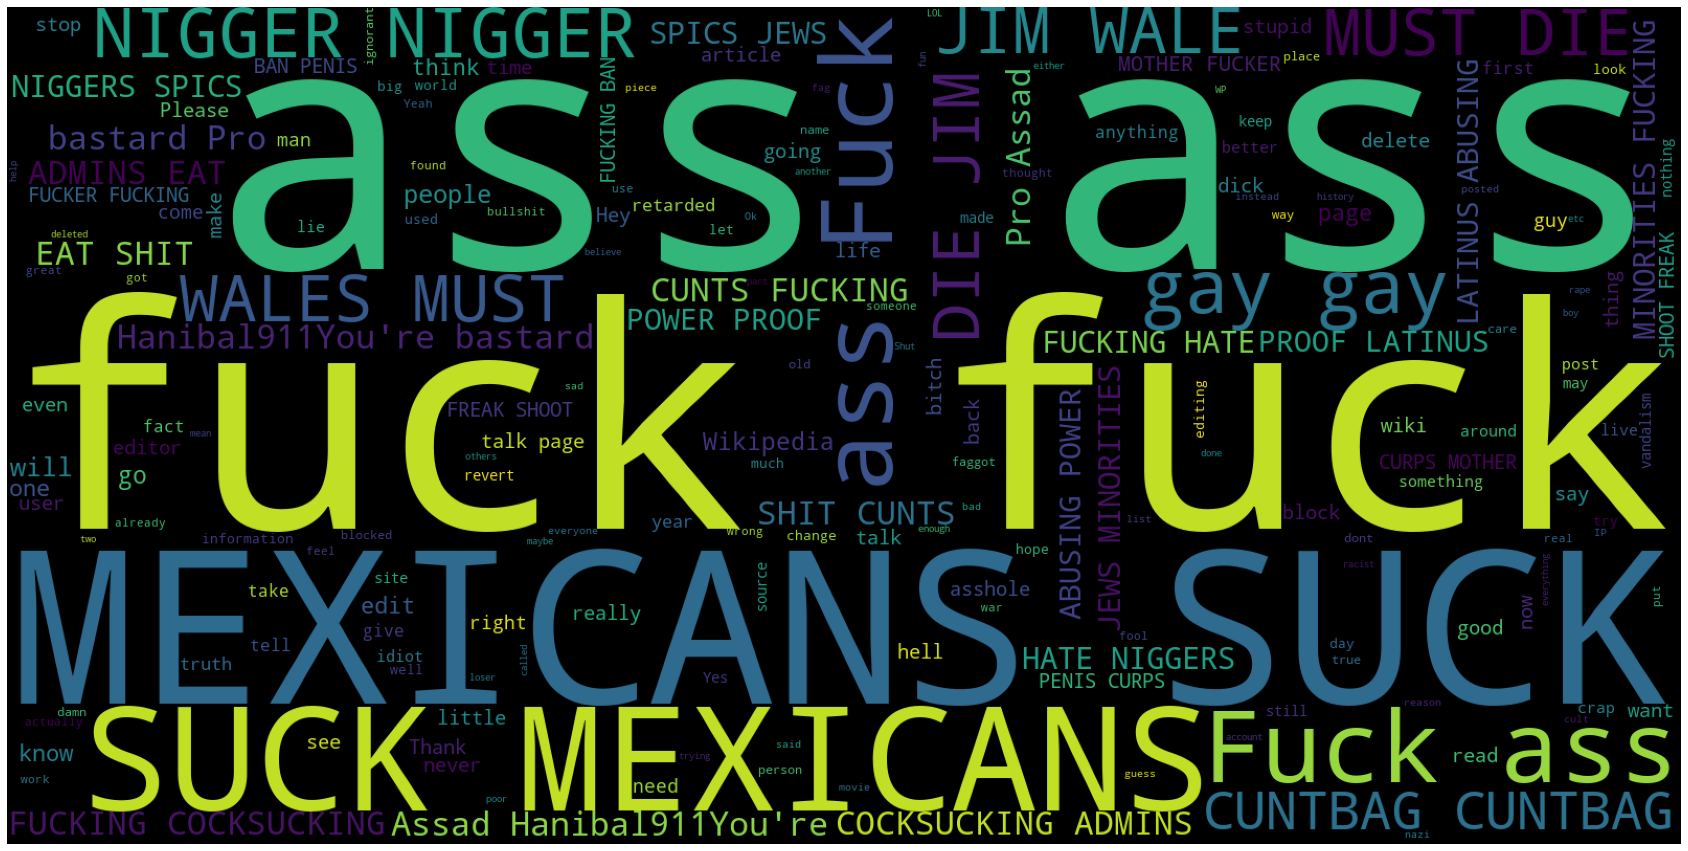

In [11]:
plt.figure(1,figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

2. Get the comments into a list, for easy text cleanup and manipulation

In [12]:
comment = [','.join(wiki.comment_text.values)]


In [13]:
print(type(comment))

<class 'list'>


3. Cleanup: 

  1.Using regular expressions, remove IP addresses

  2.Using regular expressions, remove URLs

  3.Normalize the casing

  4.Tokenize using word_tokenize from NLTK

  5.Remove stop words

  6.Remove punctuation

  7.Define a function to perform all these steps, you’ll use this later on the actual test set



In [14]:
#removing ip
test = ["About 68.197.163.149's mass vandalism"] 

re_ip = re.compile(r"\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}[^0-9]")
test =  [re_ip.sub('',w) for w in test]

test

['About s mass vandalism']

In [15]:
#removing URLs

sample = ["{https://en.wikipedia.org/w/index.php?title=Political_correctness&diff;=prev&oldid;=693709828} ... nb this change, with tags, if we avoid 'characterising', the early UK/Aust etc. uses, I think OR is avoided. If we put a small number of quotes WITHIN the ref (as 1793 judge), I think undue weight is avoided. I think finding a RS which describes in what sense 'Cade' is first modern use, is achievable."]

re_urls = re.compile(r"http\S+")
sample = [re_urls.sub('',w) for w in sample]


sample

["{ ... nb this change, with tags, if we avoid 'characterising', the early UK/Aust etc. uses, I think OR is avoided. If we put a small number of quotes WITHIN the ref (as 1793 judge), I think undue weight is avoided. I think finding a RS which describes in what sense 'Cade' is first modern use, is achievable."]

In [16]:
#normalize casing
sample = ["{https://en.wikipedia.org/w/index.php?title=Political_correctness&diff;=prev&oldid;=693709828} ... nb this change, with tags, if we avoid 'characterising', the early UK/Aust etc. uses, I think OR is avoided. If we put a small number of quotes WITHIN the ref (as 1793 judge), I think undue weight is avoided. I think finding a RS which describes in what sense 'Cade' is first modern use, is achievable."]

sample = [word.lower() for word in sample]

sample


["{https://en.wikipedia.org/w/index.php?title=political_correctness&diff;=prev&oldid;=693709828} ... nb this change, with tags, if we avoid 'characterising', the early uk/aust etc. uses, i think or is avoided. if we put a small number of quotes within the ref (as 1793 judge), i think undue weight is avoided. i think finding a rs which describes in what sense 'cade' is first modern use, is achievable."]

In [17]:
#tokenizing


from nltk.tokenize import word_tokenize
sample = ["{https://en.wikipedia.org/w/index.php?title=Political_correctness&diff;=prev&oldid;=693709828} ... nb this change, with tags, if we avoid 'characterising', the early UK/Aust etc. uses, I think OR is avoided. If we put a small number of quotes WITHIN the ref (as 1793 judge), I think undue weight is avoided. I think finding a RS which describes in what sense 'Cade' is first modern use, is achievable."]
sample = [word_tokenize(w) for w in sample]


In [18]:
#remove stopwords
sample = ["{https://en.wikipedia.org/w/index.php?title=Political_correctness&diff;=prev&oldid;=693709828} ... nb this change, with tags, if we avoid 'characterising', the early UK/Aust etc. uses, I think OR is avoided. If we put a small number of quotes WITHIN the ref (as 1793 judge), I think undue weight is avoided. I think finding a RS which describes in what sense 'Cade' is first modern use, is achievable."]
stop_words = set(stopwords.words('english'))
sample = [word for word in sample if not word in stop_words]


In [19]:
#remove punctuation
text = ["{https://en.wikipedia.org/w/index.php?title=Political_correctness&diff;=prev&oldid;=693709828} ... nb this change, with tags, if we avoid 'characterising', the early UK/Aust etc. uses, I think OR is avoided. If we put a small number of quotes WITHIN the ref (as 1793 judge), I think undue weight is avoided. I think finding a RS which describes in what sense 'Cade' is first modern use, is achievable."]
re_punc = re.compile('[%s]' % re.escape(string.punctuation))
tokens = [re_punc.sub('',w) for w in text]
tokens

['httpsenwikipediaorgwindexphptitlePoliticalcorrectnessdiffprevoldid693709828  nb this change with tags if we avoid characterising the early UKAust etc uses I think OR is avoided If we put a small number of quotes WITHIN the ref as 1793 judge I think undue weight is avoided I think finding a RS which describes in what sense Cade is first modern use is achievable']

In [20]:
from nltk.tokenize import word_tokenize
#defining function for cleanup and preprocess
def cleanup(sentence):
    #removeing Ip
    sentence = re.sub(r"\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}[^0-9]",'',sentence)
    #removing urls
    sentence = re.sub(r"http\S+",'',sentence)
    #removing punctuation
    sentence = re.sub('[%s]' % re.escape(string.punctuation),'',sentence)
    #normalizing
    sentence = sentence.lower()
    #tokenizing
    words = word_tokenize(sentence)
    #stopwords removal
    words = [w for w in words if not w in stopwords.words("english")]
    return words

#define function for preprocess data for modeling    
def preprocess(sentence):
    words = cleanup(sentence)
    #sentence formation
    return ' '.join(words)


In [21]:
for i in comment:

  cleaned_doc = cleanup(i)
 
print(cleaned_doc[0:10])
print('\n')
print('length of cleaned_doc : ' + str(len(cleaned_doc)))

['barnstar', 'defender', 'wiki', 'barnstar', 'like', 'edit', 'kayastha', 'page', 'lets', 'form']


length of cleaned_doc : 173228


4. Using a counter, find the top terms in the data. 

  1. Can any of these be considered contextual stop words? 

  2. Words like “Wikipedia”, “page”, “edit” are examples of contextual stop   words

      If yes, drop these from the data

In [22]:
from collections import Counter

In [23]:
term_count = Counter(cleaned_doc)

In [24]:
term_count.most_common(15)

[('article', 1615),
 ('page', 1486),
 ('wikipedia', 1108),
 ('please', 992),
 ('talk', 977),
 ('would', 962),
 ('one', 845),
 ('like', 833),
 ('dont', 771),
 ('ass', 706),
 ('also', 645),
 ('think', 628),
 ('see', 624),
 ('fuck', 620),
 ('know', 589)]

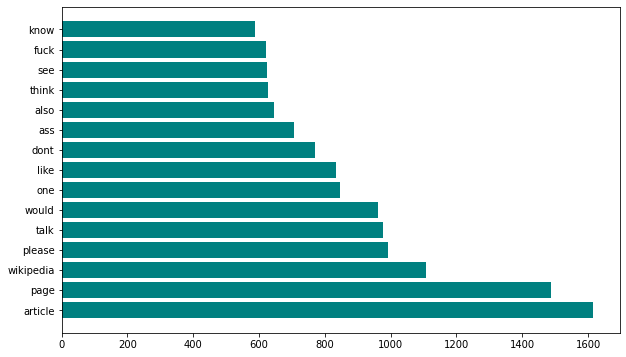

In [25]:
#ploting to featured words
res = {term:cnt for term, cnt in term_count.most_common(15)}
import matplotlib.pyplot as plt
plt.figure(figsize=[10,6])
plt.barh(list(res.keys()), list(res.values()), color="teal")
plt.show()

Words like “Wikipedia”, “page”, “article” are examples of contextual stop   words

Removing contextual stopwords

In [26]:
wiki['comment_text']=wiki['comment_text'].apply(lambda x: re.sub('[Aa]rticle','', x))
wiki['comment_text']=wiki['comment_text'].apply(lambda x: re.sub('[Pp]age','', x))
wiki['comment_text']=wiki['comment_text'].apply(lambda x: re.sub('[Ww]ikipedia','', x))

In [27]:
comment = [','.join(wiki.comment_text.values)]
for i in comment:
    cleaned_doc = cleanup(i)
 
print(cleaned_doc[0:10])

['barnstar', 'defender', 'wiki', 'barnstar', 'like', 'edit', 'kayastha', 'lets', 'form', 'solidarity']


In [28]:
print('length of cleaned_doc : ' + str(len(cleaned_doc)))

length of cleaned_doc : 168037


In [29]:
term_count = Counter(cleaned_doc)
term_count.most_common(15)

[('talk', 1000),
 ('please', 992),
 ('would', 962),
 ('one', 845),
 ('like', 833),
 ('dont', 771),
 ('ass', 706),
 ('also', 645),
 ('think', 628),
 ('see', 624),
 ('fuck', 620),
 ('know', 589),
 ('edit', 546),
 ('use', 543),
 ('im', 534)]

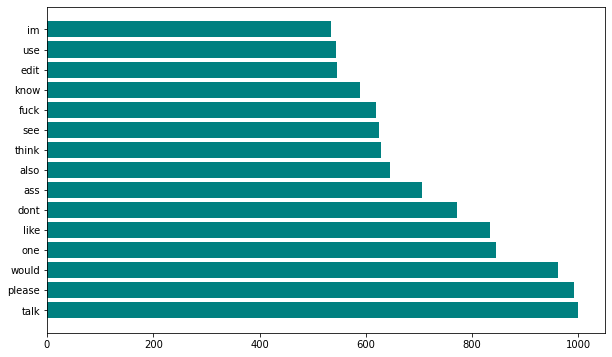

In [30]:
#ploting to featured words
res = {term:cnt for term, cnt in term_count.most_common(15)}
import matplotlib.pyplot as plt
plt.figure(figsize=[10,6])
plt.barh(list(res.keys()), list(res.values()), color="teal")
plt.show()

5. Separate into train and test sets

  1. Use train-test method to divide your data into 2 sets: train and test

  2. Use a 70-30 split

In [31]:
from tqdm import tqdm, tqdm_notebook

tqdm.pandas()

/usr/local/lib/python3.7/dist-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [32]:
#preparing cleaned dataset
wiki['cleaned_comment'] = wiki['comment_text'].progress_apply(lambda x: preprocess(x))
wiki_cleaned_df = wiki.drop(['id','comment_text'], axis=1)

wiki_cleaned_df.head()

100%|██████████| 5000/5000 [00:37<00:00, 132.03it/s]


,toxic,cleaned_comment
0,0,barnstar defender wiki barnstar like edit kaya...
1,0,seems unbalanced whatever said mathsci said fa...
2,0,marya dzmitruk born minsk belarus march 19 199...
3,0,talkback dear celestia
4,0,new categories honestly think need add categor...


In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X = wiki_cleaned_df['cleaned_comment']
y = wiki_cleaned_df['toxic']

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.30, random_state=0) 

In [35]:
type(X_train)

pandas.core.series.Series

In [36]:
X_train.head()

2858    would interested know consensus discussion act...
1559    temporarily blocked editing vandalism wish mak...
1441    theories science fiction parallel universes re...
2179    12 august 2006 utc consider second warning inc...
1390    hi trpod hear still one 5 horsemen trying astr...
Name: cleaned_comment, dtype: object

In [37]:
X_train.shape

(3500,)

6. Use TF-IDF values for the terms as feature to get into a vector space model

  1. Import TF-IDF vectorizer from sklearn

  2. Instantiate with a maximum of 4000 terms in your vocabulary

  3. Fit and apply on the train set

  4. Apply on the test set

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer()


# remove English stop words
vect.set_params(stop_words='english')

# include 1-grams and 2-grams
vect.set_params(ngram_range=(1, 2))

# ignore terms that appear in more than 50% of the documents
vect.set_params(max_df=0.5)

# only keep terms that appear in at least 2 documents
vect.set_params(min_df=2)
vect.set_params(max_features=4000)
vect.set_params(binary=True)

TfidfVectorizer(analyzer='word', binary=True, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.5, max_features=4000,
                min_df=2, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [39]:
train_vector = vect.fit_transform(X_train)

In [40]:
test_vector = vect.transform(X_test)

7. Model building: Support Vector Machine

  1. Instantiate SVC from sklearn with a linear kernel

  2. Fit on the train data

  3. Make predictions for the train and the test set

In [41]:
#model building
from sklearn import svm

svm=svm.SVC(kernel='linear', probability=True)

In [42]:
# fit the SVC model based on the given training data
svm.fit(train_vector, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [43]:
#prediction
pred = svm.predict(test_vector)

8. Model evaluation: Accuracy, recall, and f1_score

  1. Report the accuracy on the train set

  2. Report the recall on the train set:decent, high, low?

  3. Get the f1_score on the train set

In [44]:
from sklearn.metrics import accuracy_score, f1_score, recall_score

In [45]:
#accuracy score
accuracy_score(y_test,pred)


0.946

In [46]:
#recall score
recall_score(y_test, pred)

0.40310077519379844

Recall score is low, data is Imbalanced.

In [47]:
#f1 score
f1_score(y_test, pred)

0.5621621621621621

9. Looks like you need to adjust  the class imbalance, as the model seems to focus on the 0s

  1.Adjust the appropriate parameter in the SVC module



In [48]:
from sklearn.svm import SVC
svm_balanced = SVC(kernel='linear', class_weight='balanced', probability=True)

10. Train again with the adjustment and evaluate

  1.Train the model on the train set

  2.Evaluate the predictions on the validation set: accuracy, recall, f1_score



In [49]:
svm_balanced.fit(train_vector, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [50]:
pred_balanced = svm_balanced.predict(test_vector)

In [51]:
accuracy_score(y_test,pred_balanced)

0.9426666666666667

In [52]:
recall_score(y_test, pred_balanced)

0.6511627906976745

In [53]:
f1_score(y_test, pred_balanced)

0.6614173228346458

11. Hyperparameter tuning

  1. Import GridSearch and StratifiedKFold (because of class imbalance)

  2. Provide the parameter grid to choose for ‘C’

  3. Use a balanced class weight while instantiating the Support Vector Classifier

In [54]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

In [55]:
parameters = {'C': np.arange(0.1, 1, 0.05)}

In [56]:
svm_balanced = SVC(kernel='linear', class_weight='balanced', probability=True)

12. Find the parameters with the best recall in cross validation

  1. Choose ‘recall’ as the metric for scoring

  2. Choose stratified 5 fold cross validation scheme

  3. Fit on the train set

In [57]:
skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(X, y)
print(skf)

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)


In [58]:
for train_index, test_index in skf.split(X, y):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [59]:
train_vector = vect.fit_transform(X_train)

In [60]:
test_vector = vect.transform(X_test)

In [61]:
grid_search = GridSearchCV(svm_balanced, param_grid=parameters,
                           cv=5, scoring='recall')

In [62]:
grid_search.fit(train_vector, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight='balanced', coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=0)

13. What are the best parameters?

In [63]:
print(grid_search.best_params_)

{'C': 0.25000000000000006}


In [64]:
grid_search.score(test_vector, y_test)

0.6931818181818182

14. Predict and evaluate using the best estimator

  1. Use best estimator from the grid search to make predictions on the test set

  2. What is the recall on the test set for the toxic comments?

  3. What is the f1_score?

In [65]:
pred_Cv = grid_search.best_estimator_.predict(test_vector)

In [66]:
recall_score(y_test, pred_Cv)

0.6931818181818182

In [67]:
f1_score(y_test, pred_Cv)

0.6455026455026455

15. What are the most prominent terms in the toxic comments?

  1. Separate the comments from the test set that the model identified as toxic

  2. Make one large list of the terms

  3. Get the top 15 terms

In [68]:
df_model = pd.DataFrame(X_test)

In [69]:
df_model['pred']=pred_Cv

In [70]:
df_model.head()

,cleaned_comment,pred
3872,murder pets slash tires giant assclown name by...,1
3876,u suck donkey balls yeah,1
3883,im gay vodka pants,1
3892,crzrussian slit wrists,0
3920,may allah swt either give punishment hidiyaat ...,0


In [71]:
df_toxic = df_model.loc[(df_model['pred']==1)]

In [72]:
df_toxic.head()

,cleaned_comment,pred
3872,murder pets slash tires giant assclown name by...,1
3876,u suck donkey balls yeah,1
3883,im gay vodka pants,1
3930,threatening im disruptive disruptive,1
3957,gay leader yamla gay niggers saturn jupiter ha...,1


In [74]:
toxic_comment = [','.join(df_toxic.cleaned_comment.values)]

In [78]:

for i in toxic_comment:

  toxic_words = cleanup(i)
 
print(toxic_words[0:10])
print('\n')
print('length of toxic_words : ' + str(len(toxic_words)))

['murder', 'pets', 'slash', 'tires', 'giant', 'assclown', 'name', 'byran', 'mattison', 'gay']


length of toxic_words : 2888


In [79]:
term_count_toxic = Counter(toxic_words)

In [80]:
term_count_toxic.most_common(15)

[('fucking', 105),
 ('shit', 96),
 ('cunts', 95),
 ('cocksucking', 95),
 ('eat', 95),
 ('admins', 95),
 ('like', 31),
 ('people', 30),
 ('freak', 27),
 ('shoot', 27),
 ('dont', 26),
 ('one', 18),
 ('emo', 16),
 ('think', 15),
 ('way', 13)]

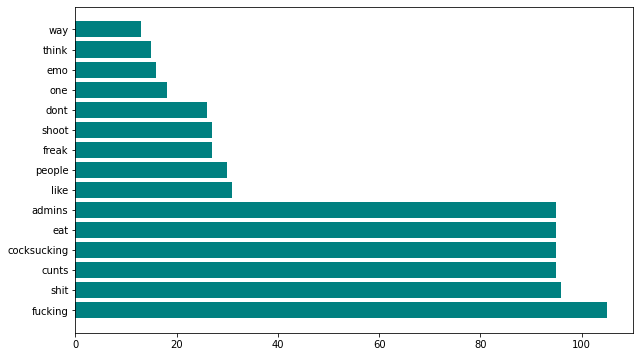

In [81]:
#ploting to featured words
res = {term:cnt for term, cnt in term_count_toxic.most_common(15)}
import matplotlib.pyplot as plt
plt.figure(figsize=[10,6])
plt.barh(list(res.keys()), list(res.values()), color="teal")
plt.show()

In [83]:
w_model=' '.join(df_toxic['cleaned_comment'])
ws = " ".join([word for word in w_model.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [84]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=1600,
                      height=800
                     ).generate(ws)

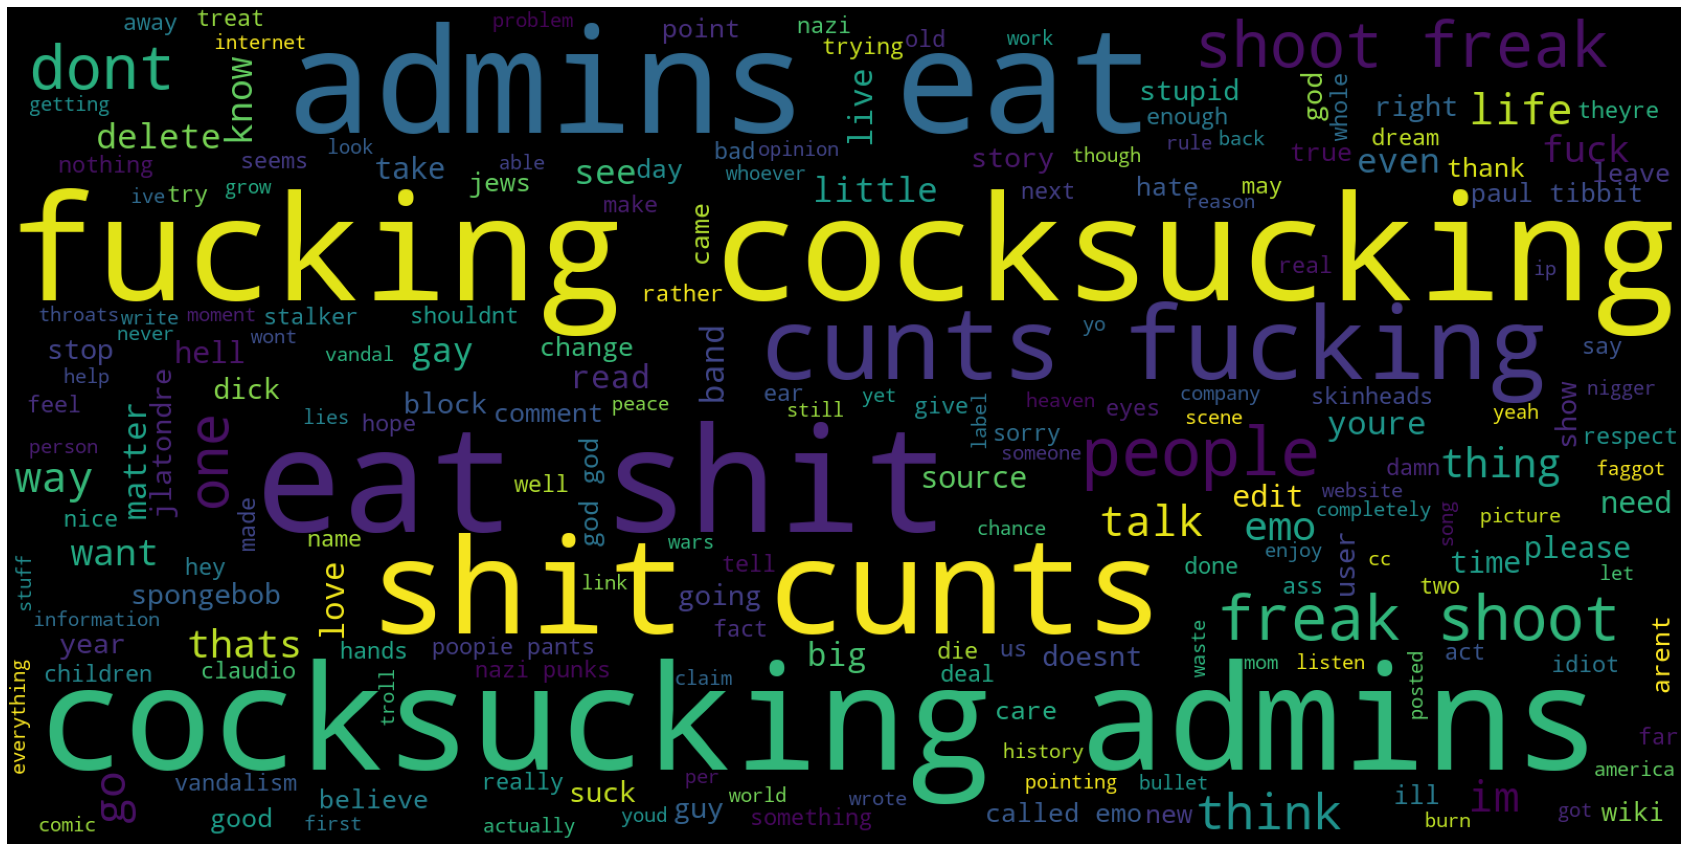

In [85]:
plt.figure(1,figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()